<h1>CP321: Analysis of the highest weekly earners in Canada</h1>
<center><h3>Sohan Hossain, Prithvi Paturi, Vikas Movva</h3></center>



<h2>Introduction</h2>
<hr>

Money is what makes the world go round. It’s not a doubt that a majority of people are interested in knowing how to make more money. Our project focuses on understanding how education influences income in Canada, while also emphasizing factors such as age and geographic location. Our dataset analysis aims to pinpoint which group in the Canadian workforce earns the most each week, while also interpreting those factors individually.

<h2>Problem Question</h2>
<hr>

<h3>How do education level, age group, and employment type affect the average weekly wage in Canada? </h3>

/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_34519/232447832.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_data['Education level'] = full_time_data['Education level'].str.strip()
/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_34519/232447832.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_wages_full_time_ordered = full_time_data.groupby('Education level')['Both Sexes'].mean().reset_index()


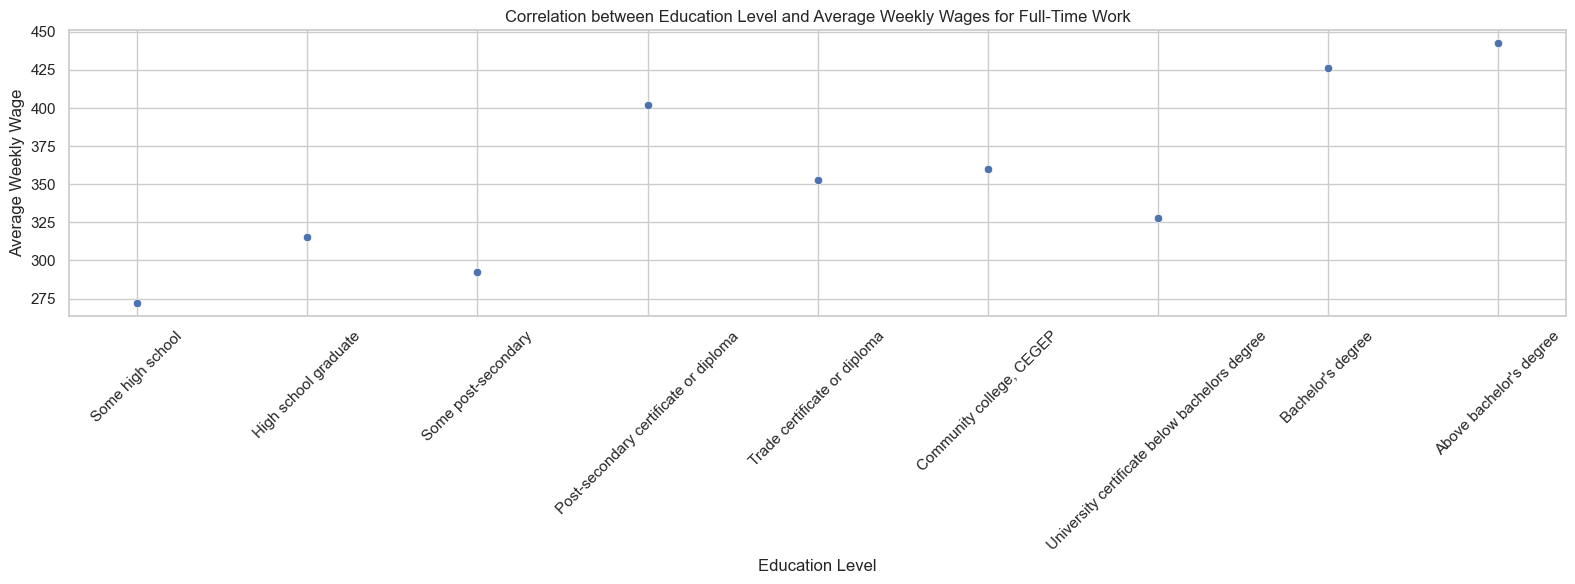

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('dataset.csv')
full_time_data = data[data['Type of work'].str.strip() == 'Full-time']

education_level_order = [
    'Some high school',
    'High school graduate',
    'Some post-secondary',
    'Post-secondary certificate or diploma',
    'Trade certificate or diploma',
    'Community college, CEGEP',
    'University certificate below bachelors degree',
    "Bachelor's degree",
    "Above bachelor's degree"
]

full_time_data = data[data['Type of work'].str.strip() == 'Full-time']

full_time_data['Education level'] = full_time_data['Education level'].str.strip()
full_time_data = full_time_data[~full_time_data['Education level'].isin(['0 - 8 years', 'University degree'])]
full_time_data['Education level'] = pd.Categorical(full_time_data['Education level'], categories=education_level_order, ordered=True)

education_wages_full_time_ordered = full_time_data.groupby('Education level')['Both Sexes'].mean().reset_index()


plt.figure(figsize=(16, 6))
sns.scatterplot(data=education_wages_full_time_ordered, x='Education level', y='Both Sexes')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Weekly Wage')
plt.title('Correlation between Education Level and Average Weekly Wages for Full-Time Work')
plt.tight_layout()
plt.show()